In [ ]:
## 1234

In [137]:
# 필요한 라이브러리 불러오기
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.datasets import load_diabetes, load_iris, make_blobs, fetch_openml
from sklearn.model_selection import train_test_split, validation_curve, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from sklearn import metrics, svm, metrics, datasets
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 선형 회귀: 당뇨병 예제

In [78]:
# 데이터셋 로드
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [79]:
X = diabetes.data

In [80]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [81]:
# 데이터셋 혈당 데이터 추출
# 혈당 데이터는 2번째 열에 위치
# 2번째 열은 0부터 시작하므로 2번째 열은 인덱스 3에 해당
# reshape 함수는 1차원 배열을 2차원 배열로 변환
X = diabetes.data[:, 2].reshape(-1, 1)  
y = diabetes.target  # Sugar level

In [82]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [83]:
y = diabetes.target.reshape(-1, 1)  # reshape 함수를 사용해 1차원 배열을 2차원 배열로 변환

In [84]:
# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

LinearRegression()

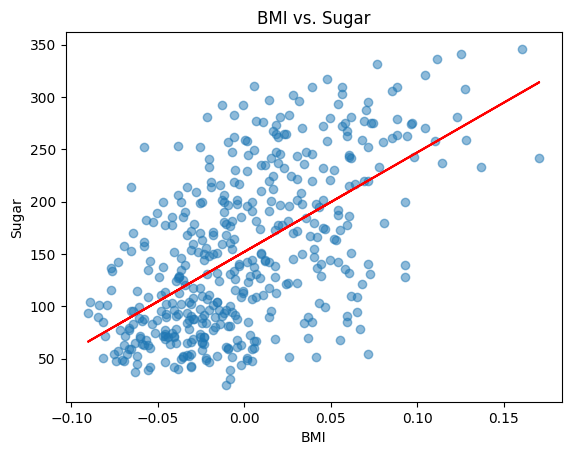

In [85]:
# 회귀선 그리기
y_pred = model.predict(X) # 예측값
plt.scatter(X,y, alpha=0.5)
plt.plot(X,y_pred, color='red')
plt.title('BMI vs. Sugar')
plt.xlabel('BMI')
plt.ylabel('Sugar')
plt.show()

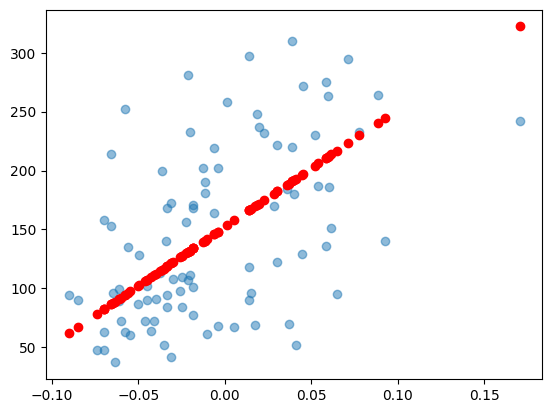

In [ ]:
# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 모델을 훈련 세트로 학습
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # 테스트 세트에 대한 예측값

plt.scatter(X_test, y_test, alpha=0.5, label='Actual') # 실제 값
plt.scatter(X_test, y_pred, color='red', label='Predicted') # 예측 값
plt.show()

### K-NN: Iris 

In [ ]:
# Iris 데이터셋 로드
iris = load_iris()

In [ ]:
# 입력과 출력을 설정한다. 
X = iris.data
y = iris.target

# 전체 데이터를 학습 데이터와 테스트 데이터 비율 (80:20)으로 분할한다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(120, 4)


In [ ]:
# 학습 단계
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# 테스트 단계
y_pred = knn.predict(X_test)

# 정확도 점수 출력
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

1.0


In [91]:
# 새로운 데이터 제시
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# 아직 보지 못한 새로운 데이터를 제시해보자. 
x_new = [[3,4,5,2],
         [5,4,2,2]] # 2개의 새로운 데이터
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### SVM, SVC: Iris

In [ ]:
svc = svm.SVC(gamma=0.1, C=5) 

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# 정확도 점수 출력
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

1.0


In [93]:
# 새로운 데이터 제시
x_new = [[3,4,5,2],
         [5,4,2,2]] # 2개의 새로운 데이터
y_predict = svc.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
setosa


### Decision Tree: Iris

In [ ]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

학습 데이터 정확도: 1.0
테스트 데이터 정확도: 0.9666666666666667


[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 

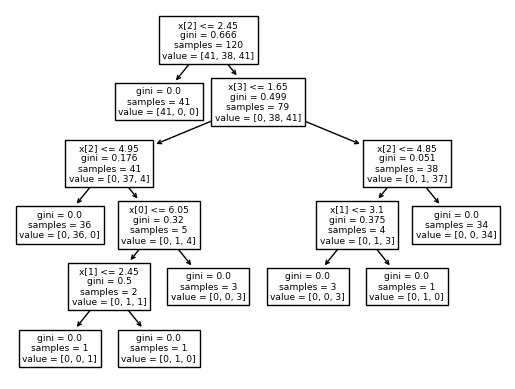

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.20)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print("학습 데이터 정확도:", accuracy_score(y_true = y_train, y_pred = y_pred))

y_pred = clf.predict(X_test)
print("테스트 데이터 정확도:", accuracy_score(y_true = y_test, y_pred=y_pred))

from sklearn.tree import plot_tree
plot_tree(clf)

### K-Means Clustering

[[16.66666667 15.83333333]
 [72.16666667 75.66666667]]
[0 0 0 0 0 0 1 1 1 1 1 1]


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


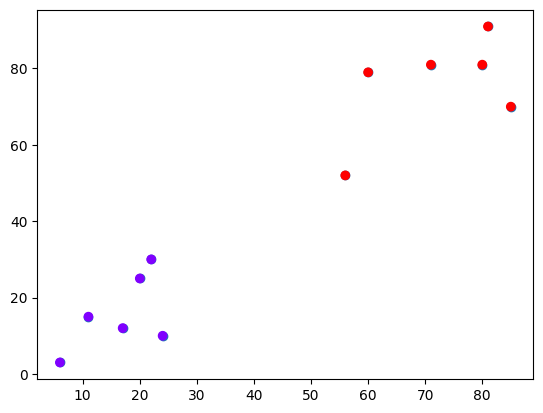

In [ ]:
# X는 2차원 배열로, 각 행은 데이터 포인트를 나타냄
X = np.array([
     [6,3], [11,15], [17,12], [24,10], [20,25], [22,30],
     [85,70], [71,81], [60,79], [56,52], [81,91], [80,81]])

# X[:,0]: X의 모든 행에서 첫 번째 열, X[:,1]: X의 모든 행에서 두 번째 열
plt.scatter(X[:,0],X[:,1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# 각 클러스터의 중심 좌표
print(kmeans.cluster_centers_)

# 각 데이터 포인트가 속한 클러스터 레이블
print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

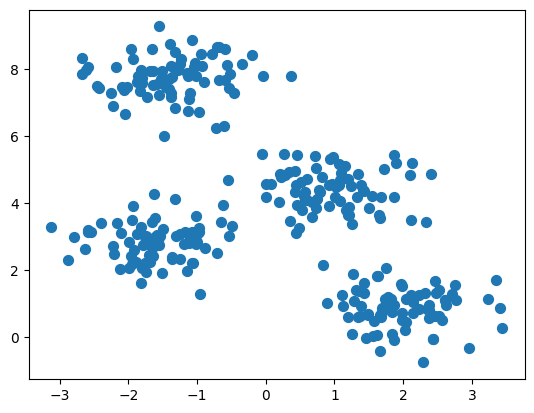

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)


[0 1 3 1 0 0 2 3 1 1 2 1 3 1 0 3 3 0 2 2 0 0 3 2 2 3 0 3 2 3 1 1 3 1 1 1 1
 1 2 0 3 2 3 3 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 3 1 2 2 2 1 0 1 2 3 2 1 2
 2 1 2 3 0 1 0 3 0 0 1 3 0 3 1 1 3 0 1 2 2 3 0 0 3 2 1 0 1 0 3 0 0 3 1 3 2
 2 0 1 0 3 1 0 0 3 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 3 1 1 2 3 2 3 2 1 3
 1 1 1 3 1 3 0 2 1 2 0 3 1 3 3 0 3 2 2 3 0 3 3 1 0 3 2 1 0 0 3 2 0 3 2 2 3
 3 3 3 0 1 3 2 3 3 2 2 2 3 2 1 3 2 0 2 3 1 2 1 3 1 3 2 3 3 1 2 2 0 0 3 1 0
 0 2 0 2 3 1 1 3 3 1 3 0 2 3 0 2 1 2 0 3 0 1 1 1 1 2 2 1 3 2 0 3 2 2 2 0 0
 1 3 3 2 0 1 2 3 1 3 0 0 2 2 3 0 0 0 3 1 1 0 0 3 0 0 0 1 2 1 3 0 0 1 1 1 0
 0 3 1 2]


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


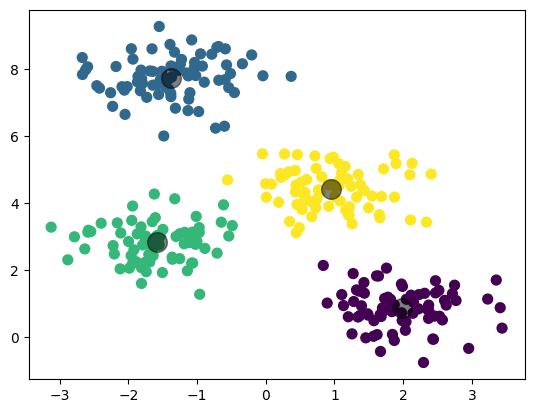

In [98]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 클러스터 중심을 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

### PCA 분석

In [ ]:
# 붓꽃 데이터를 읽어 판다스 데이터로 구성
iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  

In [ ]:
# 표준화 전처리
features = iris['feature_names']
print(features)
# : 모든 행을 선택, features는 지정한 열 이름들, .values는 선택한 데이터를 NumPy 배열로 변환
# df에서 features에 해당하는 열을 뽑아 numpy 배열로 변환
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

print(X)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e

In [ ]:
# 표준화된 붓꽃 데이터에 PCA를 적용
pca = PCA(n_components=2)
pca_result  = pca.fit_transform(X)
principalDf = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])
principalDf, df['target']

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

          PC1       PC2  target
0   -2.264703  0.480027     0.0
1   -2.080961 -0.674134     0.0
2   -2.364229 -0.341908     0.0
3   -2.299384 -0.597395     0.0
4   -2.389842  0.646835     0.0
..        ...       ...     ...
145  1.870503  0.386966     2.0
146  1.564580 -0.896687     2.0
147  1.521170  0.269069     2.0
148  1.372788  1.011254     2.0
149  0.960656 -0.024332     2.0

[150 rows x 3 columns]


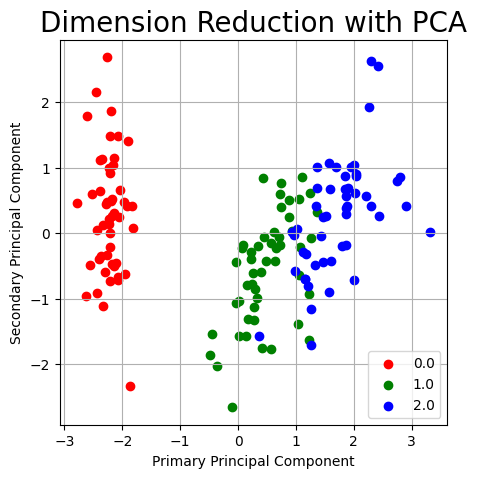

In [102]:
# 2차원 공간으로 축소된 데이터를 가시화

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize = 20)
targets = [0.0, 1.0, 2.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    idx = finalDf['target'] == target
    ax.scatter(finalDf.loc[idx, 'PC1'] , finalDf.loc[idx, 'PC2']
               , c = color)
ax.legend(targets)
ax.grid()

### 퍼셉트론 프로그래밍

In [119]:
# 훈련 집합 구축
X=[[0,0],[0,1],[1,0],[1,1]]
y=[-1,1,1,1]

# fit 함수로 Perceptron 학습
p=Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수: ",p.coef_,p.intercept_) # p.coef_는 가중치, p.intercept_는 절편
print("훈련집합에 대한 예측: ",p.predict(X))
print("정확률 측정: ",p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [120]:
# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

In [105]:
# x_train, x_test은 64차원 벡터, y_train, y_test는 0~9 사이의 숫자 레이블 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

In [106]:
# fit 함수로 Perceptron 학습
p=Perceptron(max_iter=100,eta0=0.001,verbose=0)
p.fit(x_train,y_train) # digit 데이터로 모델링

res=p.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i] # 예측이 맞은 경우의 수를 합산
accuracy=no_correct/len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

[[73.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0. 65.  1.  0.  2.  2.  0.  0. 12.  3.]
 [ 0.  0. 73.  1.  0.  0.  0.  0.  3.  0.]
 [ 0.  1.  2. 71.  0.  0.  0.  1.  4.  1.]
 [ 0.  0.  0.  0. 62.  0.  0.  2.  0.  0.]
 [ 1.  1.  0.  2.  0. 74.  1.  0.  2.  1.]
 [ 0.  0.  0.  0.  0.  1. 69.  0.  3.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 63.  3.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 46.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  4. 61.]]
테스트 집합에 대한 정확률은  91.3769123783032 %입니다.


다층 퍼셉트론: digit

In [108]:
# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

In [109]:
# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

Iteration 1, loss = 2.52792610
Iteration 2, loss = 0.38023657
Iteration 3, loss = 0.25868264
Iteration 4, loss = 0.20568326
Iteration 5, loss = 0.17472332
Iteration 6, loss = 0.14738803
Iteration 7, loss = 0.13203174
Iteration 8, loss = 0.11364978
Iteration 9, loss = 0.10083835
Iteration 10, loss = 0.09518829
Iteration 11, loss = 0.08776207
Iteration 12, loss = 0.07537353
Iteration 13, loss = 0.06983062
Iteration 14, loss = 0.06454186
Iteration 15, loss = 0.06071830
Iteration 16, loss = 0.05410670
Iteration 17, loss = 0.05225592
Iteration 18, loss = 0.05041402
Iteration 19, loss = 0.04727987
Iteration 20, loss = 0.04225860
Iteration 21, loss = 0.04078671
Iteration 22, loss = 0.04066633
Iteration 23, loss = 0.03592494
Iteration 24, loss = 0.03407405
Iteration 25, loss = 0.03256910
Iteration 26, loss = 0.03222497
Iteration 27, loss = 0.02912442
Iteration 28, loss = 0.02893885
Iteration 29, loss = 0.02714101
Iteration 30, loss = 0.02633689
Iteration 31, loss = 0.02485683
Iteration 32, los

In [110]:
# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# MLP 분류기 모델을 학습
mlp=MLPClassifier(hidden_layer_sizes=(100),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd',verbose=True)
mlp.fit(x_train,y_train)

res=mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy*100, "%입니다.")

Iteration 1, loss = 2.05608219
Iteration 2, loss = 0.30493664
Iteration 3, loss = 0.19266092
Iteration 4, loss = 0.15689207
Iteration 5, loss = 0.12370875
Iteration 6, loss = 0.10237320
Iteration 7, loss = 0.09025085
Iteration 8, loss = 0.07786994
Iteration 9, loss = 0.06886133
Iteration 10, loss = 0.06302822
Iteration 11, loss = 0.05769489
Iteration 12, loss = 0.04992626
Iteration 13, loss = 0.04616667
Iteration 14, loss = 0.04460734
Iteration 15, loss = 0.04081699
Iteration 16, loss = 0.03721684
Iteration 17, loss = 0.03504087
Iteration 18, loss = 0.03290108
Iteration 19, loss = 0.03117781
Iteration 20, loss = 0.02942909
Iteration 21, loss = 0.02743246
Iteration 22, loss = 0.02568907
Iteration 23, loss = 0.02476984
Iteration 24, loss = 0.02343348
Iteration 25, loss = 0.02342387
Iteration 26, loss = 0.02185662
Iteration 27, loss = 0.02165722
Iteration 28, loss = 0.02023891
Iteration 29, loss = 0.01910442
Iteration 30, loss = 0.01875985
Iteration 31, loss = 0.01800428
Iteration 32, los

### 하이퍼 파라미터 매개변수 최적화: validation curve 함수 이용

In [ ]:
# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit=datasets.load_digits()
x_train,x_test,y_train,y_test=train_test_split(digit.data,digit.target,train_size=0.6)

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start=time.time() # 시작 시각
mlp=MLPClassifier(learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
prange=range(50,1001,50)
# 조정할 하이퍼 파라미터: hidden_layer_sizes 은닉층 노드 개수
train_score,test_score=validation_curve(mlp,x_train,y_train,param_name="hidden_layer_sizes",param_range=prange,cv=10,scoring="accuracy",n_jobs=4)
end=time.time() # 끝난 시각
print("하이퍼 매개변수 최적화에 걸린 시간은",end-start,"초입니다.")

하이퍼 매개변수 최적화에 걸린 시간은 184.5517246723175 초입니다.


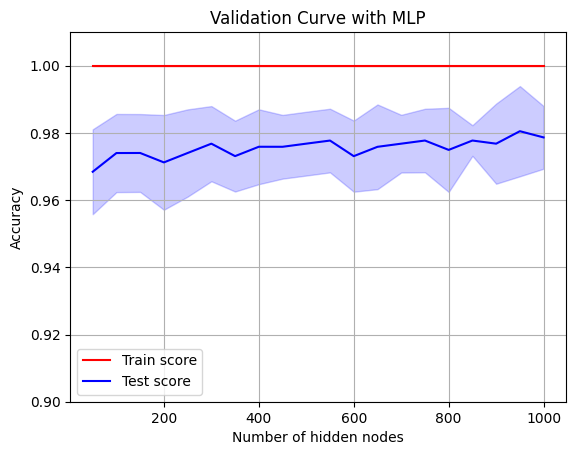


최적의 은닉층의 노드 개수는 950 개입니다.



In [112]:
# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score,axis=1)
train_std = np.std(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)
test_std = np.std(test_score,axis=1)

# 성능 그래프 그리기
plt.plot(prange,train_mean,label="Train score",color="r")
plt.plot(prange,test_mean,label="Test score",color="b")
plt.fill_between(prange,train_mean-train_std,train_mean+train_std,alpha=0.2,color="r")
plt.fill_between(prange,test_mean-test_std,test_mean+test_std,alpha=0.2,color="b")
plt.legend(loc="best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes"); plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes=prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는",best_number_nodes,"개입니다.\n")

In [113]:
# 최적의 은닉 노드 개수로 모델링
mlp_test=MLPClassifier(hidden_layer_sizes=(best_number_nodes),learning_rate_init=0.001,batch_size=32,max_iter=300,solver='sgd')
mlp_test.fit(x_train,y_train)

# 테스트 집합으로 예측
res=mlp_test.predict(x_test)

# 혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

# 정확률 계산
no_correct=0
for i in range(10):
    no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("테스트 집합에 대한 정확률은", accuracy*100, "%입니다.")

[[73.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 77.  0.  0.  0.  0.  0.  0.  3.  1.]
 [ 0.  0. 66.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 69.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 76.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 68.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1. 75.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0. 66.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0. 65.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0. 72.]]
테스트 집합에 대한 정확률은 98.33101529902642 %입니다.


![](D:/김동영/11_Github/mygit-1/mygit-2/인공지능수업/2025-06-14-17-30-35.png)

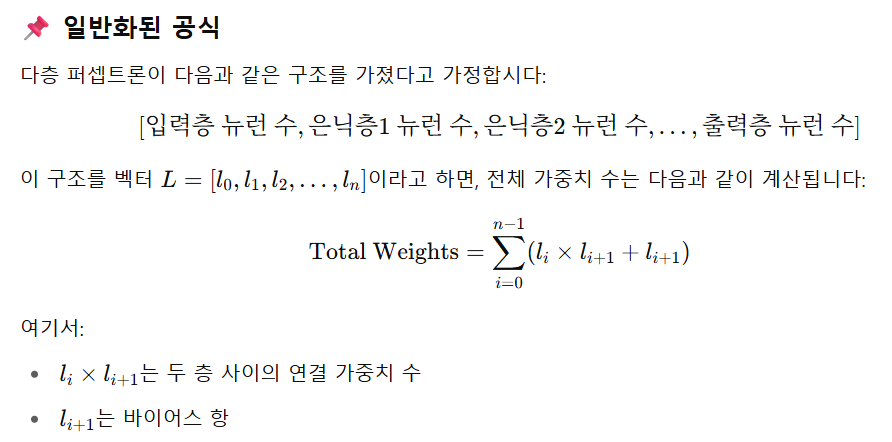

In [123]:
Image('D:/김동영/11_Github/mygit-1/mygit-2/인공지능수업/2025-06-14-17-30-35.png')

텐서플로를 활용한 MLP

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 - 9s - 19ms/step - accuracy: 0.8963 - loss: 0.0264 - val_accuracy: 0.9468 - val_loss: 0.0129
Epoch 2/30
469/469 - 8s - 16ms/step - accuracy: 0.9534 - loss: 0.0106 - val_accuracy: 0.9576 - val_loss: 0.0085
Epoch 3/30
469/469 - 8s - 17ms/step - accuracy: 0.9657 - loss: 0.0070 - val_accuracy: 0.9650 - val_loss: 0.0067
Epoch 4/30
469/469 - 7s - 15ms/step - accuracy: 0.9749 - loss: 0.0053 - val_accuracy: 0.9695 - val_loss: 0.0058
Epoch 5/30
469/469 - 7s - 15ms/step - accuracy: 0.9797 - loss: 0.0044 - val_accuracy: 0.9722 - val_loss: 0.0055
Epoch 6/30
469/469 - 7s - 15ms/step - accuracy: 0.9826 - loss: 0.0038 - val_accuracy: 0.9749 - val_loss: 0.0047
Epoch 7/30
469/469 - 7s - 15ms/step - accuracy: 0.9846 - loss: 0.0033 - val_accuracy: 0.9739 - val_loss: 0.0050
Epoch 8/30
469/469 - 7s - 16ms/step - accuracy: 0.9857 - loss: 0.0031 - val_accuracy: 0.9753 - val_loss: 0.0045
Epoch 9/30
469/469 - 7s - 15ms/step - accuracy: 0.9884 - loss: 0.0026 - val_accuracy: 0.9766 - val_loss:

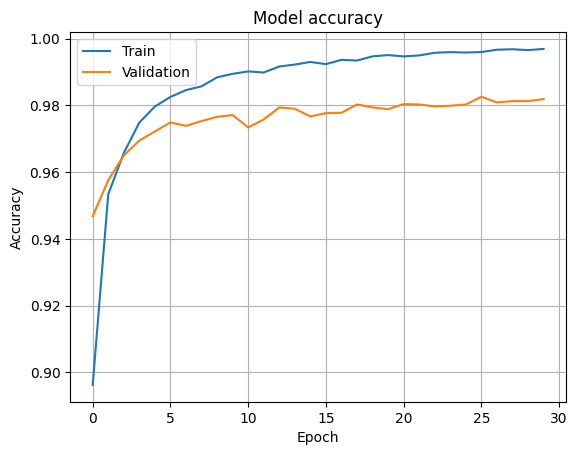

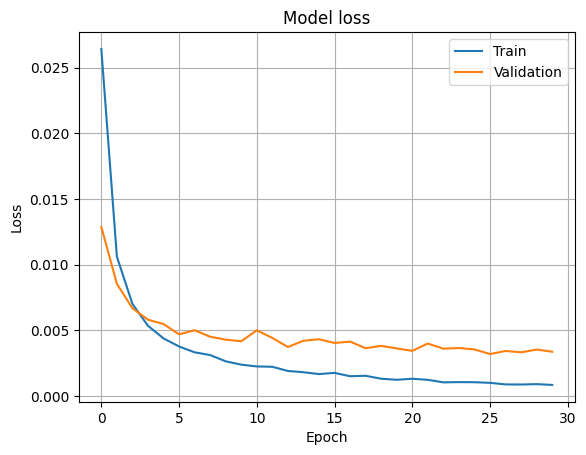

In [125]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0

y_train=tf.keras.utils.to_categorical(y_train,10) # 타겟 레이블을 원-핫 인코딩으로 변환
y_test=tf.keras.utils.to_categorical(y_test,10) # 타겟 레이블을 원-핫 인코딩으로 변환

# 신경망 구조 설정
n_input=784 # 데이터 하나 당 784차원 벡터
n_hidden1=1024 # 첫 번째 은닉층 노드 개수
n_hidden2=512 # 두 번째 은닉층 노드 개수
n_hidden3=512 # 세 번째 은닉층 노드 개수
n_hidden4=512 # 네 번째 은닉층 노드 개수
n_output=10 # 출력층 노드 개수 (0~9까지의 숫자이므로 10개)

# 신경망 구조 설계
mlp=Sequential()
# actication, kernel_initializer, bias_initializer는 모두 기본값으로 설정
# kernel_initializer는 가중치 초기화하여 기울기 소실이나 폭발 문제를 방지한다. 
# 4개의 은닉층으로 이루어졌으며, 각 은닉층은 tanh 활성화 함수를 사용한다.
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
# 옵티마이저로는 Adam을 사용했으나 Adagrad(), RMSprop(), SGD() 등 다른 것도 사용 가능
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

### 여러 손실함수 사용

In [ ]:
# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차(MSE)를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy']) # loss 함수로 평균제곱오차 사용
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피(Cross Entropy)를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy']) # loss 함수로 교차 엔트로피 사용
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

### 여러 옵티마이저

In [130]:
# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [131]:
# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD: 0.8568333268165589
Adam: 0.8960166811943054
Adagrad: 0.8328166604042053
RMSprop: 0.8934666752815247


C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_10184\4141433188.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])


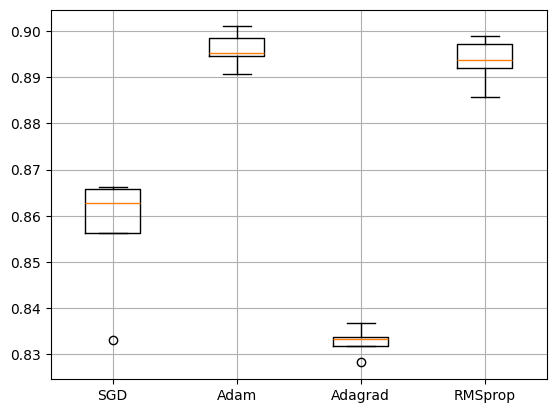

In [136]:
# 하이퍼 매개변수 설정
batch_siz=256 # 배치 사이즈는 한 번에 학습할 때 사용하는 데이터의 개수를 의미한다. 
n_epoch=20
k=5 # 5-겹

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    # 4개의 은닉층을 가진 다층 퍼셉트론 모델을 설계
    # 각 은닉층은 ReLU 활성화 함수를 사용하고, 출력층은 소프트맥스 활성화 함수를 사용한다.
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt_class):  # 인스턴스 대신 "클래스"를 받음
    accuracy=[]
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]

        dmlp = build_model()
        opt = opt_class()  # 💡 여기서 새로운 옵티마이저 인스턴스 생성
        dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        dmlp.fit(xtrain, ytrain, batch_size=batch_siz, epochs=n_epoch, verbose=0)
        accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
    return accuracy


# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd = cross_validation(SGD)
acc_adam = cross_validation(Adam)
acc_adagrad = cross_validation(Adagrad)
acc_rmsprop = cross_validation(RMSprop)

# 옵티마이저 4개의 정확률을 비교
print("SGD:",np.array(acc_sgd).mean())
print("Adam:",np.array(acc_adam).mean())
print("Adagrad:",np.array(acc_adagrad).mean())
print("RMSprop:",np.array(acc_rmsprop).mean())

# 네 옵티마이저의 정확률을 박스플롯으로 비교
plt.boxplot([acc_sgd,acc_adam,acc_adagrad,acc_rmsprop],labels=["SGD","Adam","Adagrad","RMSprop"])
plt.grid()

### CNN

컨볼루션 연산   
- 특징 추출 또는 신호 변환에 사용   
- 수용장과 커널의 선형 결합   

컨볼루션 특징   
- 커널에 따라 특징 맵 추출한다    
- 원본 영상과 같은 크기의 특징 맵 생성    

다중 커널을 사용    
- 하나의 커널을 사용한다면, 커널이 한 종류의 특징만 추출하므로 매우 빈약한 특성이 생성된다.   
- 따라서 여러 개의 커널을 사용해 특징을 풍부하게 추출한다.    

In [ ]:
Image('D:/김동영/11_Github/mygit-1/mygit-2/인공지능수업/2025-06-14-17-30-35.png')

텐서플로를 활용해서 CNN 구현

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data() # MNIST 데이터셋을 읽어옴
x_train=x_train.reshape(60000,28,28,1) # 총 60000개의 이미지, 28x28픽셀, 1채널(흑백)
x_test=x_test.reshape(10000,28,28,1)   # 총 10000개의 이미지, 28x28픽셀, 1채널(흑백)
x_train=x_train.astype(np.float32)/255.0 # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
x_test=x_test.astype(np.float32)/255.0  # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
y_train=tf.keras.utils.to_categorical(y_train,10) # 0~9까지의 숫자이므로 10개의 클래스
y_test=tf.keras.utils.to_categorical(y_test,10) # 0~9까지의 숫자이므로 10개의 클래스

In [ ]:
# LeNet-5 신경망 모델 설계
cnn=Sequential()
# 3개의 합성곱층(Conv2D)과 2개의 풀링층(Maxpooling2D)으로 구성된 LeNet-5 신경망 모델을 설계
# 숫자 의미 : (필터 개수, (필터 크기)), padding='same' : 입력과 출력의 크기를 같게 유지
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
# MaxPooling을 사용하여 2x2 크기의 필터로 2배로 다운샘플링
cnn.add(MaxPooling2D(pool_size=(2,2))) # 풀링층은 2x2 크기의 필터를 사용하여 2배로 다운샘플링
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
# MUlti Layer Perceptron(MLP) : Fully Connected Layer
cnn.add(Flatten()) # 3차원 데이터를 1차원으로 변환
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

규제 기법을 추가하여 CNN 구현

In [ ]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # CIFAR-10 데이터셋을 읽어옴
# train : 50000개, test: 10000개
x_train=x_train.astype(np.float32)/255.0 # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
x_test=x_test.astype(np.float32)/255.0  # float32형으로 변환 후 픽셀값을 0~1사이로 정규화
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 213s 1us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# 신경망 모델 설계
# 4개의 합성곱층(Conv2D)과 3개의 풀링층(Maxpooling2D)으로 구성된 신경망 모델을 설계
# 규제화 기법으로 드롭아웃(Dropout)과 데이터 증대 기법을 사용
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
# 데이터 증대기(ImageDataGenerator)를 사용하여 학습 데이터에 대한 변형을 생성
# width_shift_range : 수평 이동 범위, height_shift_range : 수직 이동 범위
# horizontal_flip : 수평 반전 여부
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

dropout 비율을 달리 적용

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 하이퍼 매개변수 설정
batch_siz=128 # 배치 크기
n_epoch=10 # 에포크 수
k=5 # k-겹 교차 검증

# 드롭아웃 비율에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
    accuracy=[]
    for train_index,val_index in KFold(k).split(x_train): # KFold를 사용하여 훈련 집합과 검증 집합으로 분할
        # 훈련 집합과 검증 집합으로 분할
        xtrain,xval=x_train[train_index],x_train[val_index]
        ytrain,yval=y_train[train_index],y_train[val_index]

        # 신경망 모델 설계
        cnn=Sequential()
        cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
        cnn.add(Conv2D(32,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[0]))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(Conv2D(64,(3,3),activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2,2)))
        cnn.add(Dropout(dropout_rate[1]))
        cnn.add(Flatten())
        cnn.add(Dense(512,activation='relu'))
        cnn.add(Dropout(dropout_rate[2]))
        cnn.add(Dense(10,activation='softmax'))

        # 신경망 모델을 학습하고 평가하기
        # loss : 크로스 엔트로피 손실 함수, optimizer : Adam optimizer 사용
        cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
        cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
        accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
    return accuracy

# 드롭아웃 비율을 달리하며 신경망을 평가
acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5]) # 드롭아웃 비율을 0.25, 0.25, 0.5로 설정

print("드롭아웃 적용 안 할 때:",np.array(acc_without_dropout).mean()) # 드롭아웃 적용 안 할 때 평균 정확률
print("드롭아웃 적용할 때:",np.array(acc_with_dropout).mean()) # 드롭아웃 적용할 때 평균 정확률

import matplotlib.pyplot as plt

# 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Dropout","With Dropout"])

배치 사이즈와 에폭 수 조정

In [ ]:
# 배치 사이즈와 에폭 수에 따라 교차 검증을 수행하고 정확률을 반환하는 함수
def cross_validation_with_batch_and_epoch(batch_size, epochs):
  accuracy = []
  for train_index, val_index in KFold(k).split(x_train):  # KFold를 사용하여 훈련 집합과 검증 집합으로 분할
    # 훈련 집합과 검증 집합으로 분할
    xtrain, xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]

    # 신경망 모델 설계
    cnn = Sequential()
    cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))
    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(10, activation='softmax'))

    # 신경망 모델을 학습하고 평가하기
    cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    cnn.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs, verbose=0)
    accuracy.append(cnn.evaluate(xval, yval, verbose=0)[1])
  return accuracy


In [ ]:
# 배치 사이즈와 에폭 수를 저장하는 리스트
batch_sizes = [64, 128, 256]
epochs_list = [10, 20, 5]

  # 각 배치 사이즈와 에폭 수에 대해 신경망을 평가
accuracies = []
for batch_size, epochs in zip(batch_sizes, epochs_list):
  acc = cross_validation_with_batch_and_epoch(batch_size=batch_size, epochs=epochs)
  accuracies.append((batch_size, epochs, np.array(acc).mean()))

  # 결과 출력
for batch_size, epochs, mean_acc in accuracies:
  print(f"배치 사이즈: {batch_size}, 에폭 수: {epochs}, 평균 정확률: {mean_acc}")

  # 박스 플롯으로 정확률 표시
plt.grid()
plt.boxplot([cross_validation_with_batch_and_epoch(batch_size=batch, epochs=epoch) for batch, epoch in zip(batch_sizes, epochs_list)],
      labels=[f"Batch {batch}, Epoch {epoch}" for batch, epoch in zip(batch_sizes, epochs_list)])
plt.title("Batch Size and Epoch Comparison")
plt.ylabel("Accuracy")
plt.show()